<a href="https://colab.research.google.com/github/jovanakalamkovic99/pattern-rec-hw-2/blob/main/Jovana_Kalamkovic_BI3_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df= pd.read_csv("ShanghaiPM20100101_20151231.csv")

In [ ]:
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")
df.head()

shape: 
 (52584, 17)

 types:
 No                 int64
year               int64
month              int64
day                int64
hour               int64
season             int64
PM_Jingan        float64
PM_US Post       float64
PM_Xuhui         float64
DEWP             float64
HUMI             float64
PRES             float64
TEMP             float64
cbwd              object
Iws              float64
precipitation    float64
Iprec            float64
dtype: object 



,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             52584 non-null  int64  
 1   year           52584 non-null  int64  
 2   month          52584 non-null  int64  
 3   day            52584 non-null  int64  
 4   hour           52584 non-null  int64  
 5   season         52584 non-null  int64  
 6   PM_Jingan      24700 non-null  float64
 7   PM_US Post     34039 non-null  float64
 8   PM_Xuhui       25189 non-null  float64
 9   DEWP           52571 non-null  float64
 10  HUMI           52571 non-null  float64
 11  PRES           52556 non-null  float64
 12  TEMP           52571 non-null  float64
 13  cbwd           52572 non-null  object 
 14  Iws            52572 non-null  float64
 15  precipitation  48575 non-null  float64
 16  Iprec          48575 non-null  float64
dtypes: float64(10), int64(6), object(1)
memory usage: 

In [ ]:
df.loc[df['DEWP'].isnull()].index

Int64Index([23, 24, 340, 341, 342, 3602, 10924, 12432, 27926, 28004, 31927,
            41426, 43961],
           dtype='int64')

In [ ]:
df.loc[df['PRES'].isnull()].index

Int64Index([   23,    24,   340,   341,   342,  3602, 10924, 12432, 27926,
            28004, 31927, 41426, 48423, 48424, 48425, 48426, 48427, 48428,
            48429, 48430, 48431, 48432, 48433, 48434, 48435, 48436, 48437,
            48438],
           dtype='int64')

In [ ]:
df.loc[df['precipitation'].isnull()].index

Int64Index([  230,   584,   812,   813,   875,   995,  1384,  1900,  2095,
             2159,
            ...
            52540, 52541, 52542, 52543, 52544, 52554, 52555, 52557, 52558,
            52559],
           dtype='int64', length=4009)

In [ ]:
df.loc[df['Iprec'].isnull()].index

Int64Index([  230,   584,   812,   813,   875,   995,  1384,  1900,  2095,
             2159,
            ...
            52540, 52541, 52542, 52543, 52544, 52554, 52555, 52557, 52558,
            52559],
           dtype='int64', length=4009)

In [ ]:
df.loc[df['HUMI'].isnull()].index

Int64Index([23, 24, 340, 341, 342, 3602, 10924, 12432, 27926, 28004, 31927,
            41426, 43961],
           dtype='int64')

In [ ]:
df.loc[df['TEMP'].isnull()].index

Int64Index([23, 24, 340, 341, 342, 3602, 10924, 12432, 27926, 28004, 31927,
            41426, 43961],
           dtype='int64')

In [ ]:
df.loc[df['cbwd'].isnull()].index

Int64Index([23, 24, 340, 341, 342, 3602, 10924, 12432, 27926, 28004, 31927,
            41426],
           dtype='int64')

In [ ]:
df.loc[df['Iws'].isnull()].index

Int64Index([23, 24, 340, 341, 342, 3602, 10924, 12432, 27926, 28004, 31927,
            41426],
           dtype='int64')

In [ ]:
df.drop([ 23,    24,   340,   341,   342,  3602, 10924, 12432, 27926,
            28004, 31927, 41426, 48423, 48424, 48425, 48426, 48427, 48428,
            48429, 48430, 48431, 48432, 48433, 48434, 48435, 48436, 48437,
            48438, 43961], inplace= True, axis = 0)

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PM_Jingan,27876,53.041575
PM_Xuhui,27384,52.105413
PM_US Post,18536,35.269717
precipitation,4006,7.622491
Iprec,4006,7.622491
PRES,0,0.000000
HUMI,0,0.000000
DEWP,0,0.000000
TEMP,0,0.000000
cbwd,0,0.000000


In [ ]:
df['precipitation'].fillna(df['precipitation'].median(), inplace=True)

In [ ]:
df['Iprec'].fillna(df['Iprec'].median(), inplace=True)

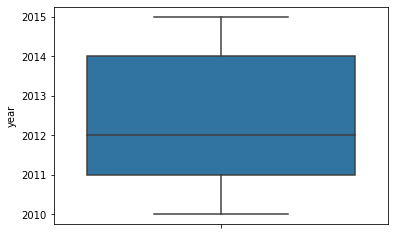

In [ ]:
sb.boxplot(y='year',data=df)

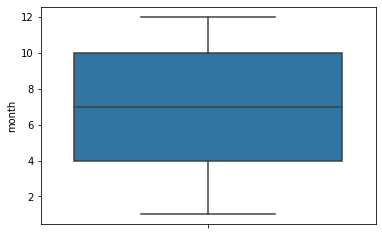

In [ ]:
sb.boxplot(y='month',data=df)

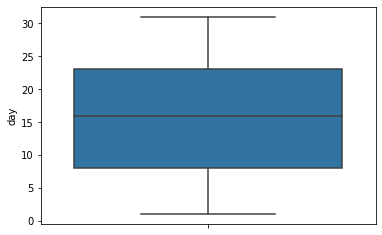

In [ ]:
sb.boxplot(y='day',data=df)

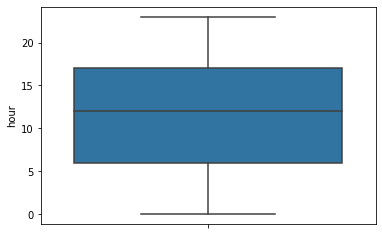

In [ ]:
sb.boxplot(y='hour',data=df)

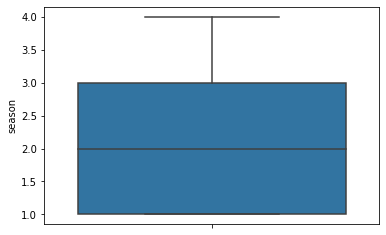

In [ ]:
sb.boxplot(y='season',data=df)

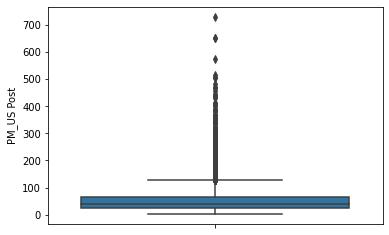

In [ ]:
sb.boxplot(y='PM_US Post',data=df)

In [ ]:
df.loc[df['PM_US Post']>200].index

Int64Index([17511, 17582, 17765, 17766, 17767, 17768, 17769, 17770, 17771,
            18049,
            ...
            52418, 52419, 52420, 52424, 52425, 52426, 52562, 52563, 52564,
            52565],
           dtype='int64', length=401)

In [ ]:
prevelik_PM = df.loc[df['PM_US Post']>200].index

In [ ]:
df.drop(prevelik_PM, inplace= True, axis = 0)

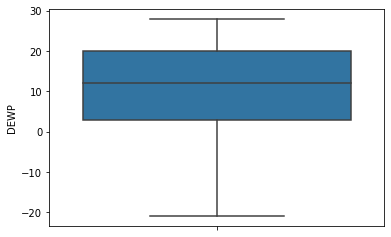

In [ ]:
sb.boxplot(y='DEWP',data=df)

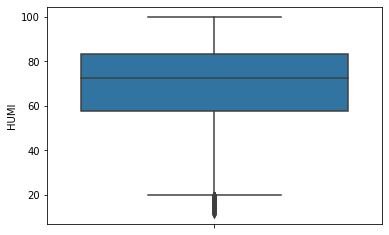

In [ ]:
sb.boxplot(y='HUMI',data=df)

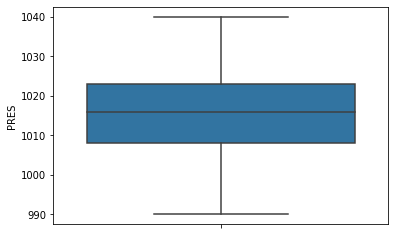

In [ ]:
sb.boxplot(y='PRES',data=df)

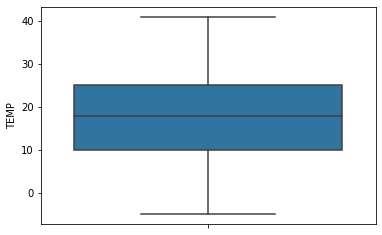

In [ ]:
sb.boxplot(y='TEMP',data=df)

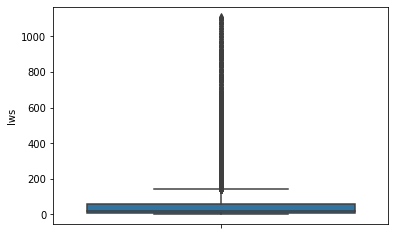

In [ ]:
sb.boxplot(y='Iws',data=df)

Sređivanje svih neverovatnih vrednosti za vetar

In [ ]:
df.loc[df['Iws']>15].index

Int64Index([    7,     8,     9,    10,    14,    19,    20,    21,    37,
               38,
            ...
            52555, 52556, 52557, 52558, 52569, 52570, 52580, 52581, 52582,
            52583],
           dtype='int64', length=28777)

In [ ]:
vr_prevelikog_vetra = df.loc[df['Iws']>15].index
percent = (6645/len(df['Iws']))*100
print(percent)

12.741112858074166


In [ ]:
df.loc[df['Iws'] > 15,'Iws'] = np.nan

In [ ]:
df['Iws'].fillna(df['Iws'].mean(), inplace=True)

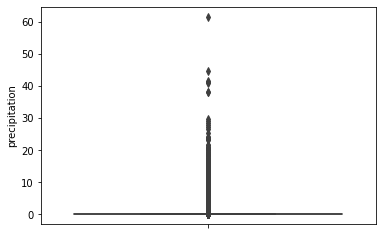

In [ ]:
sb.boxplot(y='precipitation',data=df)

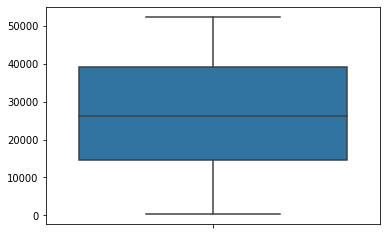

In [ ]:
vr_padavina = df.loc[df['precipitation']>0].index
sb.boxplot(y=vr_padavina,data=df)

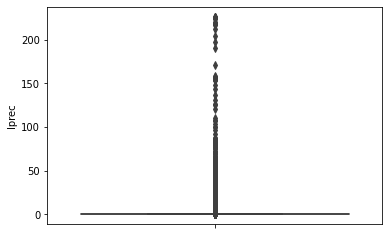

In [ ]:
sb.boxplot(y='Iprec',data=df)

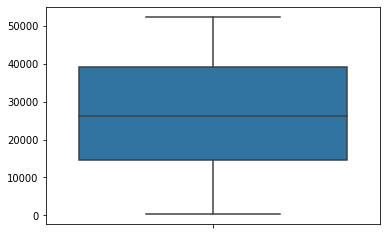

In [ ]:
vr_padavina_I = df.loc[df['Iprec']>0].index
sb.boxplot(y=vr_padavina_I,data=df)

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PM_Jingan,27802,53.307512
PM_Xuhui,27312,52.367987
PM_US Post,18536,35.540898
year,0,0.000000
month,0,0.000000
day,0,0.000000
hour,0,0.000000
season,0,0.000000
Iprec,0,0.000000
precipitation,0,0.000000


In [ ]:
df.drop(['PM_Jingan', 'PM_Xuhui'], inplace= True, axis = 1)

In [ ]:
print(df['DEWP'].describe())

count    52154.000000
mean        11.352399
std          9.880437
min        -21.000000
25%          3.000000
50%         12.000000
75%         20.000000
max         28.000000
Name: DEWP, dtype: float64


In [ ]:
print(df['TEMP'].describe())

count    52154.000000
mean        17.537121
std          9.309866
min         -5.000000
25%         10.000000
50%         18.000000
75%         25.000000
max         41.000000
Name: TEMP, dtype: float64


In [ ]:
print(df['HUMI'].describe())

count    52154.000000
mean        69.523489
std         17.673930
min         11.320000
25%         57.930000
50%         72.420000
75%         83.370000
max        100.000000
Name: HUMI, dtype: float64


In [ ]:
print(df['PRES'].describe())

count    52154.000000
mean      1015.962195
std          9.018361
min        990.000000
25%       1008.100000
50%       1015.900000
75%       1023.000000
max       1040.000000
Name: PRES, dtype: float64


In [ ]:
print(df['Iws'].describe())

count    52154.000000
mean         5.936806
std          2.781985
min          0.000000
25%          5.936806
50%          5.936806
75%          5.936806
max         15.000000
Name: Iws, dtype: float64


In [ ]:
print(df['precipitation'].describe())

count    52154.000000
mean         0.131401
std          1.026962
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         61.600000
Name: precipitation, dtype: float64


In [ ]:
print(df['Iprec'].describe())

count    52154.000000
mean         0.855244
std          6.276498
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        226.400000
Name: Iprec, dtype: float64


In [ ]:
print(df['PM_US Post'].describe())

count    33618.000000
mean        50.545958
std         35.938383
min          1.000000
25%         26.000000
50%         41.000000
75%         65.000000
max        200.000000
Name: PM_US Post, dtype: float64


In [ ]:
print(df['year'].describe())

count    52154.000000
mean      2012.491985
std          1.709330
min       2010.000000
25%       2011.000000
50%       2012.000000
75%       2014.000000
max       2015.000000
Name: year, dtype: float64


In [ ]:
print(df['month'].describe())

count    52154.000000
mean         6.527150
std          3.432881
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


In [ ]:
print(df['day'].describe())

count    52154.000000
mean        15.737834
std          8.796480
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: day, dtype: float64


In [ ]:
print(df['hour'].describe())

count    52154.000000
mean        11.506404
std          6.920453
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64


In [ ]:
print(df['season'].describe())

count    52154.000000
mean         2.482111
std          1.114208
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: season, dtype: float64


In [ ]:
df['PM_US Post'].fillna(method='ffill', inplace=True)

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PM_US Post,17434,0.334279
Iprec,0,0.000000
precipitation,0,0.000000
Iws,0,0.000000
cbwd,0,0.000000
TEMP,0,0.000000
PRES,0,0.000000
HUMI,0,0.000000
DEWP,0,0.000000
season,0,0.000000


In [ ]:
vr_nule_pm = df.loc[df['PM_US Post'].isnull()].index
df.drop(vr_nule_pm, inplace= True, axis = 0)

In [ ]:
#sb.set()
#sb.pairplot(df, height = 2.5)
#plt.show();

In [ ]:
df['cbwd'].unique()

array(['NE', 'NW', 'cv', 'SE', 'SW'], dtype=object)

In [ ]:
df.loc[df['cbwd']=='cv','cbwd']=1
df.loc[df['cbwd']=='NE','cbwd']=2
df.loc[df['cbwd']=='NW','cbwd']=3
df.loc[df['cbwd']=='SW','cbwd']=4
df.loc[df['cbwd']=='SE','cbwd']=5
print(df['cbwd'].unique())

[2 3 1 5 4]


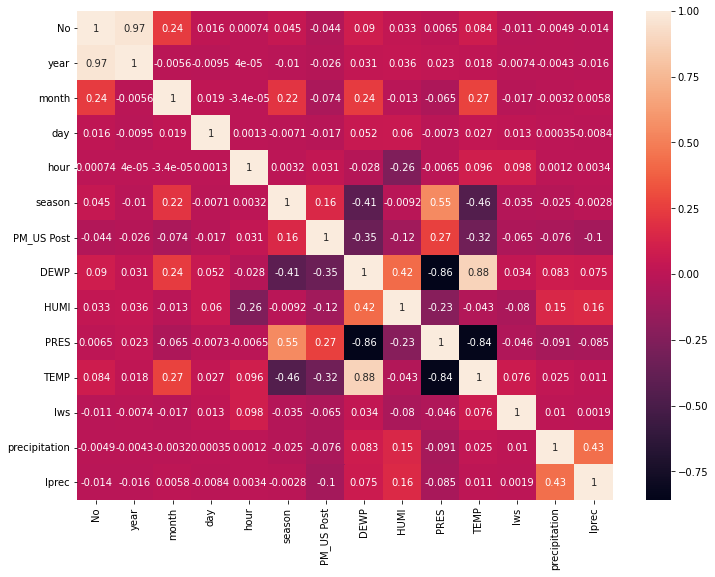

In [ ]:
corr = df.corr()
f = plt.figure(figsize=(12, 9))
sb.heatmap(corr, annot=True);

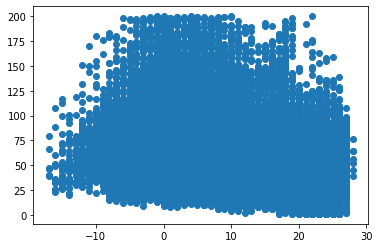

In [ ]:
plt.scatter(df['DEWP'],df['PM_US Post'])

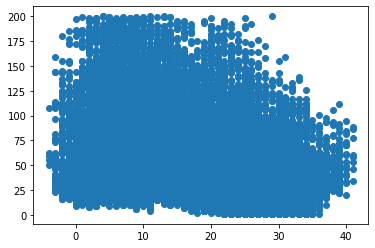

In [ ]:
plt.scatter(df['TEMP'],df['PM_US Post'])

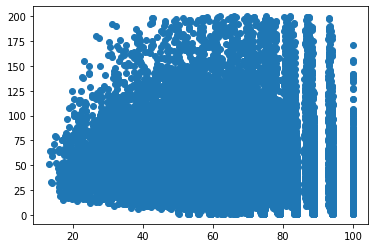

In [ ]:
plt.scatter(df['HUMI'],df['PM_US Post'])

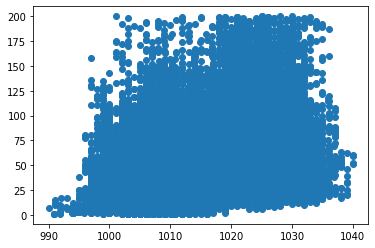

In [ ]:
plt.scatter(df['PRES'],df['PM_US Post'])

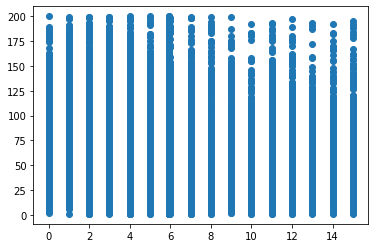

In [ ]:
plt.scatter(df['Iws'],df['PM_US Post'])

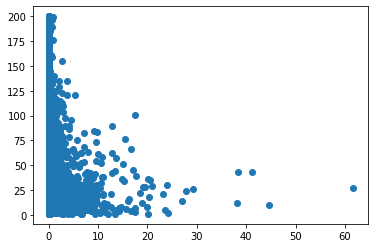

In [ ]:
plt.scatter(df['precipitation'],df['PM_US Post'])

PM US Post nema nikakvu specijalnu korelisanost

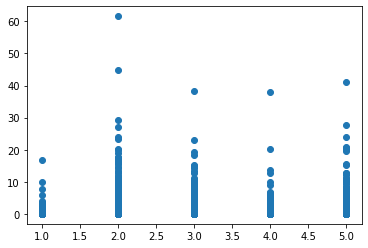

In [ ]:
plt.scatter(df['cbwd'], df['precipitation'])

Kad je bilo malo vetra, manje je i kise, ali pravac vetra ne donosi promene u kolicini kise koja je pala

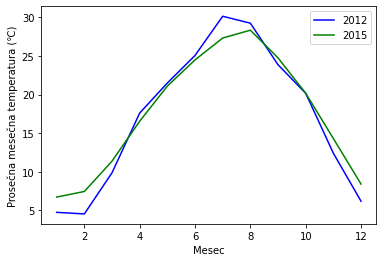

In [ ]:
gb = df.groupby(by=['year', 'month']).mean()
T_2012 = gb.loc[2012]['TEMP']
T_2015 = gb.loc[2015]['TEMP']
plt.plot(np.arange(1, 13, 1), T_2012, 'b', label='2012') 
plt.plot(np.arange(1, 13, 1), T_2015, 'g', label='2015')
plt.ylabel('Prosečna mesečna temperatura (℃)')
plt.xlabel('Mesec')
plt.legend();

LIN REG

In [ ]:
def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)

    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

In [ ]:
y=df['PM_US Post']

In [ ]:
x = df.drop('PM_US Post',axis = 1,inplace=False)

In [ ]:
x = x.drop('No',axis = 1,inplace=False)

In [ ]:
x = x.drop('cbwd',axis = 1,inplace=False)

In [ ]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34720 entries, 17442 to 52583
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           34720 non-null  int64  
 1   month          34720 non-null  int64  
 2   day            34720 non-null  int64  
 3   hour           34720 non-null  int64  
 4   season         34720 non-null  int64  
 5   DEWP           34720 non-null  float64
 6   HUMI           34720 non-null  float64
 7   PRES           34720 non-null  float64
 8   TEMP           34720 non-null  float64
 9   Iws            34720 non-null  float64
 10  precipitation  34720 non-null  float64
 11  Iprec          34720 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 3.4 MB
None


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

Mean squared error:  1044.0059129312633
Mean absolute error:  24.570197285355082
Root mean squared error:  32.31108034299168
R2 score:  0.1443258281151759
R2 adjusted score:  0.1440792992866029
        y     y_pred
0    11.0  41.201327
1    68.0  70.540958
2    27.0  39.159925
3    32.0  42.401765
4     6.0  40.134912
5    14.0  50.259251
6    66.0  63.382259
7   146.0  61.724926
8    24.0  44.097877
9    78.0  54.972918
10  104.0  56.770273
11    6.0  39.909209
12   80.0  52.159396
13   34.0  46.396703
14   31.0  64.728921
15   40.0  51.140761
16   31.0  39.733810
17   32.0  37.410261
18   21.0  56.722429
19   44.0  39.813059
koeficijenti:  [ 0.45205515  0.21714404  1.14691322 -0.33864109 -0.98555023 -2.08628825
 -0.66019717 -1.03536361 -0.39800551]


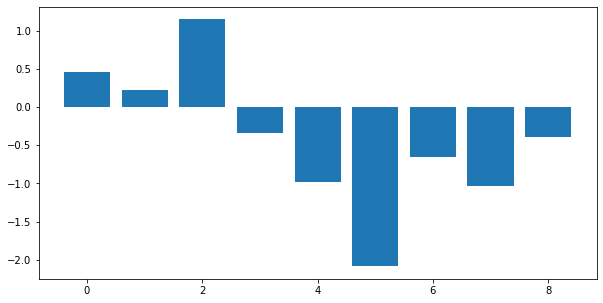

In [ ]:
# Inicijalizacija
first_regression_model = LinearRegression(fit_intercept=True)

# Obuka
first_regression_model.fit(x_train, y_train)

# Testiranje
y_predicted = first_regression_model.predict(x_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
print("koeficijenti: ", first_regression_model.coef_)

In [ ]:
# Selekcija obelezja
import statsmodels.api as sm
X = sm.add_constant(x_train)
#np.asarray(x_train)
model = sm.OLS(y_train, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     578.2
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:15:55   Log-Likelihood:            -1.5389e+05
No. Observations:               31248   AIC:                         3.078e+05
Df Residuals:                   31238   BIC:                         3.079e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1108.2807     50.560     21.920      0.000    1009.182    1207.380
month             0.4521      0.064      7.090      0.000       0.327       0.577
hour              0.2171      0.028      7.623      0.000       0.161       0.273
season            1.1469      0.215      5.322      0.000       0.725       1.569
HUMI             -0.3386      0.013    -26.557      0.000      -0.364      -0.314
PRES             -0.9856      0.049    -20.153      0.000      -1.081      -0.890
TEMP             -2.0863      0.047    -44.617      0.000      -2.178      -1.995
Iws              -0.6602      0.069     -9.521      0.000      -0.796      -0.524
precipitation    -1.0354      0.213     -4.860      0.000      -1.453      -0.618
Iprec            -0.3980      0.030    -13.096      0.000      -0.458      -0.338
==============================================================================
Omnibus:                     7307.885   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15679.301
Skew:                           1.364   Prob(JB):                         0.00
Kurtosis:                       5.144   Cond. No.                     2.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

,month,hour,season,HUMI,PRES,TEMP,Iws,precipitation,Iprec
0,-0.448699,0.938457,-1.330744,-1.623054,-0.645981,0.584809,-0.009995,-0.140153,-0.135140
1,-0.157766,0.072445,-0.433571,1.040293,-0.424077,0.475702,-0.009995,-0.140153,-0.135140
2,1.587833,1.371463,1.360776,-0.240669,1.473206,-1.160914,-0.351511,-0.140153,-0.135140
3,1.296900,-1.370909,0.463603,1.345124,-0.424077,0.039271,-0.351511,2.677808,1.183489
4,-0.448699,0.216780,-1.330744,0.748910,-0.535029,0.584809,-0.009995,-0.140153,-0.135140


In [ ]:
x = x.drop('DEWP',axis = 1,inplace=False)

In [ ]:
x = x.drop('day',axis = 1,inplace=False)

In [ ]:
x = x.drop('year',axis = 1,inplace=False)

Mean squared error:  1044.0059129312635
Mean absolute error:  24.570197285355132
Root mean squared error:  32.31108034299168
R2 score:  0.1443258281151758
R2 adjusted score:  0.1440792992866028
        y     y_pred
0    11.0  41.201327
1    68.0  70.540958
2    27.0  39.159925
3    32.0  42.401765
4     6.0  40.134912
5    14.0  50.259251
6    66.0  63.382259
7   146.0  61.724926
8    24.0  44.097877
9    78.0  54.972918
10  104.0  56.770273
11    6.0  39.909209
12   80.0  52.159396
13   34.0  46.396703
14   31.0  64.728921
15   40.0  51.140761
16   31.0  39.733810
17   32.0  37.410261
18   21.0  56.722429
19   44.0  39.813059
koeficijenti:  [  1.55381141   1.50444104   1.27836298  -6.04337732  -8.88265385
 -19.12136219  -1.81097175  -1.02876447  -2.77686245]


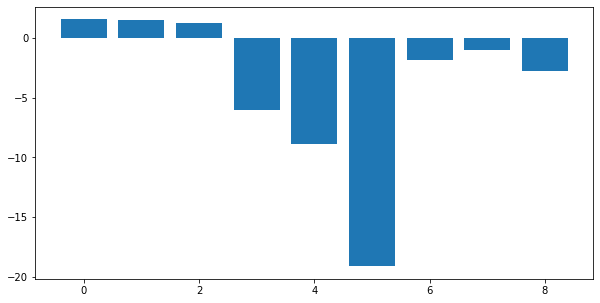

In [ ]:
# Inicijalizacija
regression_model_std = LinearRegression()

# Obuka modela
regression_model_std.fit(x_train_std, y_train)

# Testiranje
y_predicted = regression_model_std.predict(x_test_std)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_std.coef_)),regression_model_std.coef_)
print("koeficijenti: ", regression_model_std.coef_)

Mean squared error:  898.9823778468565
Mean absolute error:  22.32330658040249
Root mean squared error:  29.983034833833223
R2 score:  0.26318807951636114
R2 adjusted score:  0.261912541937221
        y     y_pred
0    11.0  26.703773
1    68.0  68.741901
2    27.0  27.053828
3    32.0  39.627976
4     6.0  27.693677
5    14.0  41.814456
6    66.0  59.208005
7   146.0  49.433987
8    24.0  44.843311
9    78.0  48.371381
10  104.0  60.339851
11    6.0  32.589812
12   80.0  49.788161
13   34.0  43.774377
14   31.0  54.421221
15   40.0  59.035527
16   31.0  34.114276
17   32.0  50.220936
18   21.0  61.442055
19   44.0  27.566505
koeficijenti:  [ 8.38282121e+01 -1.13365269e+01 -2.25516957e+02 -2.40580793e+01
  1.94776826e+01 -5.64845880e+01 -1.00863903e+01 -6.06845197e+01
 -3.18542741e+01  1.98022526e+00  1.07083452e-02  4.40194703e-01
 -7.42739389e-03 -1.06007844e-01 -3.07756681e-01  3.31333265e-02
 -3.63197853e-01 -1.45739161e-02 -6.71812146e-03  6.57483364e-02
 -1.04707279e-02  1.194035

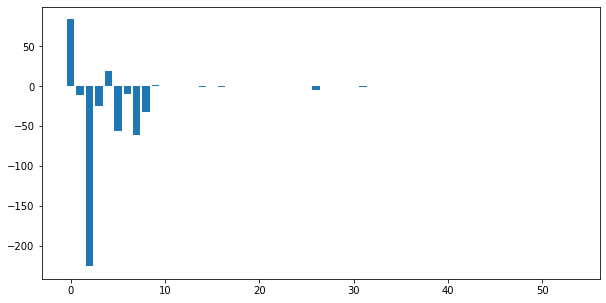

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train)
x_inter_test = poly.transform(x_test)

# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...+d1x1^2+d2x2^2+...+dnxn^2

# Inicijalizacija
regression_model_degree = LinearRegression()

# Obuka modela
regression_model_degree.fit(x_inter_train, y_train)

# Testiranje
y_predicted = regression_model_degree.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_degree.coef_)),regression_model_degree.coef_)
print("koeficijenti: ", regression_model_degree.coef_)

Mean squared error:  231995635.0534065
Mean absolute error:  351.18936198285724
Root mean squared error:  15231.402924662143
R2 score:  -190144.16148462408
R2 adjusted score:  -203153.81983553473
        y     y_pred
0    11.0  35.932131
1    68.0  67.572738
2    27.0  11.730235
3    32.0  47.609782
4     6.0  17.009755
5    14.0  32.415812
6    66.0 -33.133551
7   146.0  50.643877
8    24.0  42.046476
9    78.0  72.931411
10  104.0  47.792796
11    6.0  26.217514
12   80.0  94.705458
13   34.0  42.581031
14   31.0  21.732095
15   40.0  62.355437
16   31.0  27.262162
17   32.0  48.269876
18   21.0  65.465542
19   44.0  37.293767
koeficijenti:  [-7.73188948e+00 -4.05868081e-04  5.70839984e-05 ... -1.68531037e-06
 -5.68885271e-07 -1.60743751e-07]


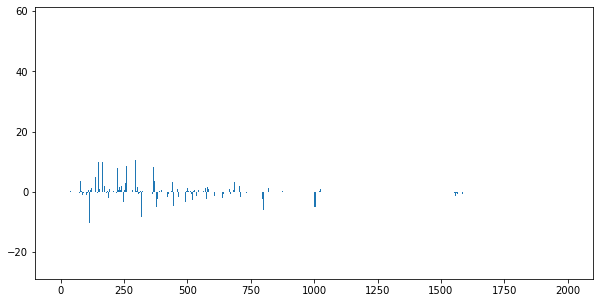

In [ ]:
poly = PolynomialFeatures(degree=5, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train)
x_inter_test = poly.transform(x_test)

# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...+d1x1^2+d2x2^2+...+dnxn^2

# Inicijalizacija
regression_model_degree = LinearRegression()

# Obuka modela
regression_model_degree.fit(x_inter_train, y_train)

# Testiranje
y_predicted = regression_model_degree.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_degree.coef_)),regression_model_degree.coef_)
print("koeficijenti: ", regression_model_degree.coef_)

Mean squared error:  900.5528792757799
Mean absolute error:  22.342472169051433
Root mean squared error:  30.00921323986652
R2 score:  0.2619008861269435
R2 adjusted score:  0.26062312021314415
        y     y_pred
0    11.0  26.522871
1    68.0  70.221190
2    27.0  26.929029
3    32.0  39.914120
4     6.0  28.137480
5    14.0  42.016347
6    66.0  60.564998
7   146.0  47.577226
8    24.0  44.720154
9    78.0  47.009086
10  104.0  61.625728
11    6.0  32.975016
12   80.0  50.056047
13   34.0  43.808751
14   31.0  54.602231
15   40.0  59.137865
16   31.0  34.229803
17   32.0  50.546416
18   21.0  60.634130
19   44.0  27.210012
koeficijenti:  [ 1.99217452e+01 -1.05884965e+01 -6.45300859e+00 -2.28493526e+01
  2.45999248e+01 -2.74857383e+01 -3.74467299e+00 -4.37697030e+00
 -2.46812558e+01  1.96771051e+00  9.62461489e-03  4.30608877e-01
 -2.52178649e-03 -4.41709018e-02 -2.52039057e-01  3.27171157e-02
 -2.66896686e-01 -8.17366403e-03 -6.44847561e-03  6.70819620e-02
 -1.03210137e-02  1.11938

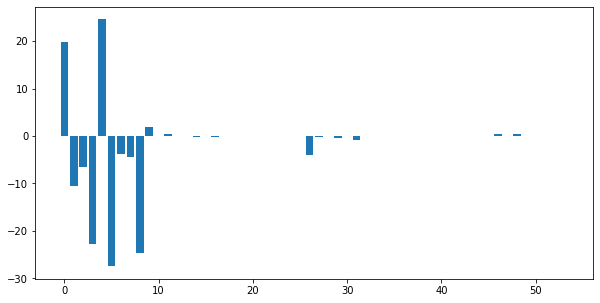

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train)
x_inter_test = poly.transform(x_test)

#Ridge regresija

# Inicijalizacija
ridge_model = Ridge(alpha=7)

# Obuka modela
ridge_model.fit(x_inter_train, y_train)

# Testiranje
y_predicted = ridge_model.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.504e+07, tolerance: 4.045e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Mean squared error:  905.5269988601339
Mean absolute error:  22.468979450683868
Root mean squared error:  30.091975655648366
R2 score:  0.25782406471867403
R2 adjusted score:  0.2565392411843813
        y     y_pred
0    11.0  26.464583
1    68.0  74.162822
2    27.0  25.730076
3    32.0  39.373139
4     6.0  32.060259
5    14.0  42.360204
6    66.0  63.968139
7   146.0  51.341071
8    24.0  45.985781
9    78.0  48.648729
10  104.0  65.925414
11    6.0  35.227571
12   80.0  54.187507
13   34.0  44.285581
14   31.0  53.826704
15   40.0  58.590227
16   31.0  34.579670
17   32.0  49.676808
18   21.0  61.308467
19   44.0  25.481557
koeficijenti:  [ 2.88276275e+00  2.65876834e-01  1.21333311e+01 -6.13851519e-01
  2.48539539e+00  1.35424619e+00 -4.73293354e+00 -3.04759269e+00
 -2.05055773e+00  1.93414898e+00  9.35814558e-03 -1.74033922e-01
 -6.53761455e-04 -2.48925132e-02 -2.44470850e-01  2.87065348e-02
 -1.91705833e-01  1.32237401e-02 -3.50508085e-03  7.31752446e-02
 -1.18441901e-02  6.6673

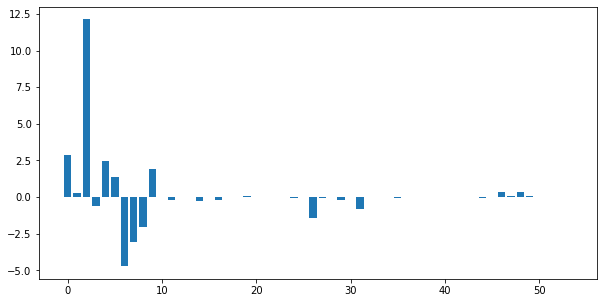

In [ ]:
#Lasso regresija

# Inicijalizacija
lasso_model = Lasso(alpha=0.01)

# Obuka modela
lasso_model.fit(x_inter_train, y_train)

# Testiranje
y_predicted = lasso_model.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)